In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import random

In [2]:
import pandas as pd

df = pd.read_csv("the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data.csv")

In [3]:
patient_id = list(df["Patient ID"])
recording_loc = list(df["Recording locations:"])
murmur = list(df["Murmur"])
murmur_loc = list(df["Murmur locations"])
systolic_murmur_timing = list(df["Systolic murmur timing"])
print(patient_id)
print(recording_loc)
print(murmur)
print(murmur_loc)
print(systolic_murmur_timing)

[2530, 9979, 9983, 13918, 14241, 14998, 23625, 24160, 29045, 29378, 31737, 33151, 36327, 38337, 39043, 39403, 39456, 40058, 40798, 40840, 43852, 44514, 45843, 46065, 46532, 46579, 46778, 47002, 49558, 49561, 49562, 49568, 49572, 49574, 49577, 49585, 49595, 49598, 49607, 49610, 49618, 49622, 49627, 49628, 49630, 49631, 49638, 49641, 49653, 49659, 49661, 49669, 49678, 49683, 49687, 49691, 49704, 49712, 49719, 49729, 49735, 49745, 49748, 49751, 49754, 49761, 49776, 49808, 49821, 49823, 49824, 49829, 49832, 49838, 49839, 49842, 49850, 49853, 49854, 49873, 49876, 49896, 49897, 49900, 49930, 49931, 49946, 49952, 49959, 49960, 49963, 49966, 49968, 49969, 49970, 49974, 49978, 49979, 49980, 49983, 49986, 49987, 49988, 49989, 49990, 49993, 49994, 49995, 49998, 49999, 50001, 50004, 50005, 50006, 50007, 50008, 50009, 50012, 50014, 50015, 50017, 50018, 50023, 50026, 50027, 50029, 50030, 50032, 50034, 50037, 50043, 50047, 50048, 50049, 50053, 50054, 50056, 50057, 50061, 50066, 50067, 50070, 50072, 5

In [4]:
recording_loc = [x.split("+") for x in recording_loc]

for i in range(len(murmur_loc)):
    if murmur_loc[i] is np.nan:
        murmur_loc[i] = []
    else:
        murmur_loc[i] = murmur_loc[i].split("+")

In [5]:
X = []
y = []

for i in range(len(patient_id)):
    if murmur[i] == "Absent":
        for recloc in recording_loc[i]:
            full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
            initial = 0
            while (initial+400) <= len(full_recording):
                X.append(full_recording[initial:initial+400])
                y.append([1, 0, 0, 0, 0])
                initial += 200
    elif murmur[i] == "Present":
        for recloc in recording_loc[i]:
            if recloc in murmur_loc[i]:
                full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
                initial = 0
                if systolic_murmur_timing[i] == "Holosystolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 1, 0, 0, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Early-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 1, 0, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Mid-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 0, 1, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Late-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 0, 0, 1])
                        initial += 200
                else:
                    print("Error on patient ID:", patient_id[i])
            else:
                full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
                initial = 0
                while (initial+400) <= len(full_recording):
                    X.append(full_recording[initial:initial+400])
                    y.append([1, 0, 0, 0, 0])
                    initial += 200

Error on patient ID: 85119
Error on patient ID: 85119


In [6]:
time_steps = 400
feature_length = 18
batch_size = 3

In [7]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25)

In [8]:
X_train_final = []
y_train_final = []

for i in range(len(X_train)):
    if y_train[i] == [1, 0, 0, 0, 0]:
        #randnum = random.uniform(0, 1)
        randnum = random.random()
        if randnum >= 0.66:
            X_train_final.append(X_train[i])
            y_train_final.append(y_train[i])
    else:
        X_train_final.append(X_train[i])
        y_train_final.append(y_train[i])

In [9]:
print(len(X_train), len(y_train))
print(len(X_train_final), len(y_train_final))
print(len(X_test), len(y_test))

22341 22341
10013 10013
7447 7447


In [10]:
model = Sequential()
model.add(LSTM(18))
model.add(Dense(18, activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(5, activation="sigmoid"))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train_final = np.array(X_train_final)
y_train_final = np.array(y_train_final)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
model.fit(X_train_final, y_train_final, epochs=10, batch_size=batch_size)

Epoch 1/10


3338/3338 [==============================] - 519s 152ms/step - loss: 1.0098 - accuracy: 0.6295
Epoch 2/10
3338/3338 [==============================] - 488s 146ms/step - loss: 0.9854 - accuracy: 0.6327
Epoch 3/10
3338/3338 [==============================] - 467s 140ms/step - loss: 0.9897 - accuracy: 0.6333
Epoch 4/10
3338/3338 [==============================] - 431s 129ms/step - loss: 0.9937 - accuracy: 0.6327
Epoch 5/10
3338/3338 [==============================] - 427s 128ms/step - loss: 0.9929 - accuracy: 0.6342
Epoch 6/10
3338/3338 [==============================] - 444s 133ms/step - loss: 0.9925 - accuracy: 0.6339
Epoch 7/10
3338/3338 [==============================] - 430s 129ms/step - loss: 0.9914 - accuracy: 0.6360
Epoch 8/10
3338/3338 [==============================] - 413s 124ms/step - loss: 0.9920 - accuracy: 0.6360
Epoch 9/10
3338/3338 [==============================] - 575s 172ms/step - loss: 0.9930 - accuracy: 0.6353
Epoch 10/10
3338/3338 [=====================

In [14]:
final_final_predicts = model.predict(X_test)
final_final_predicts.shape

233/233 [==============================] - 12s 44ms/step


(7447, 5)

In [15]:
X = np.array(X)
y = np.array(y)
score_full = model.evaluate(X, y, batch_size=batch_size, verbose=0)
print('Test loss:', score_full[0])
print('Accuracy:', score_full[1])

Test loss: 0.6683907508850098
Accuracy: 0.8351349830627441


In [16]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Accuracy:', score[1])

Test loss: 0.6656708121299744
Accuracy: 0.8375184535980225


In [17]:
final_final_predicts

array([[0.8403945 , 0.58358043, 0.451635  , 0.20395325, 0.00992025],
       [0.8321088 , 0.58553696, 0.455583  , 0.21423876, 0.00998569],
       [0.84216636, 0.5831825 , 0.45078725, 0.20177771, 0.0099047 ],
       ...,
       [0.8403945 , 0.58358043, 0.451635  , 0.20395325, 0.00992025],
       [0.8403945 , 0.58358043, 0.451635  , 0.20395325, 0.00992025],
       [0.8403945 , 0.58358043, 0.451635  , 0.20395325, 0.00992025]],
      dtype=float32)

In [18]:
for i in range(len(final_final_predicts)):
    if max(final_final_predicts[i]) != final_final_predicts[i][0]:
        print(i, final_final_predicts[i])

139 [0.6125509  0.6854161  0.4995582  0.49607083 0.00982023]
490 [0.6036807  0.6913352  0.49999318 0.5072461  0.00990399]
634 [0.49383447 0.75321686 0.49443424 0.6165308  0.0132594 ]
834 [0.49280304 0.7539682  0.49427262 0.61739624 0.01334145]
935 [0.552081   0.72020525 0.4987152  0.5621863  0.01091122]
947 [0.5130194  0.7425822  0.49661306 0.6001042  0.01227305]
1091 [0.5851661  0.7015129  0.50007683 0.52798384 0.01014247]
1178 [0.6098242  0.6870246  0.49964997 0.49934968 0.00984284]
1323 [0.54185677 0.72625124 0.49875808 0.5732104  0.01115052]
1380 [0.541655   0.7263691  0.49875522 0.5734188  0.0111563 ]
1558 [0.45310426 0.7733166  0.48673114 0.64710635 0.01600868]
1711 [0.6521431  0.66381204 0.4980247  0.44787583 0.00971929]
2353 [0.5422172  0.7260355  0.49877262 0.57284904 0.01113866]
2437 [0.5418818  0.7262355  0.4987588  0.5731849  0.01114966]
2588 [0.4849842  0.7580392  0.49324942 0.62377894 0.01378387]
2589 [0.65145355 0.6641355  0.49809864 0.44876048 0.00971397]
2689 [0.538190

In [19]:
full_predicts = model.predict(X)
full_predicts

931/931 [==============================] - 54s 58ms/step


array([[0.8403945 , 0.58358043, 0.451635  , 0.20395325, 0.00992025],
       [0.83380026, 0.585074  , 0.45478064, 0.21209206, 0.00997609],
       [0.8403945 , 0.58358043, 0.451635  , 0.20395325, 0.00992025],
       ...,
       [0.8403945 , 0.58358043, 0.451635  , 0.20395325, 0.00992025],
       [0.84319866, 0.5829655 , 0.45029715, 0.20052314, 0.00989485],
       [0.8431713 , 0.58296514, 0.45031077, 0.20055331, 0.00989537]],
      dtype=float32)

In [20]:
for i in range(len(full_predicts)):
    if max(full_predicts[i]) != full_predicts[i][0]:
        print(i, full_predicts[i])

33 [0.65855306 0.6600951  0.49743497 0.4394132  0.0097399 ]
50 [0.4566817  0.7721271  0.4879616  0.64502066 0.01574544]
51 [0.5452076  0.72455955 0.49890003 0.5699425  0.01106513]
54 [0.47071573 0.76548123 0.49087417 0.63482296 0.01472839]
57 [0.44906828 0.7748774  0.48556042 0.6497437  0.0163167 ]
58 [0.4896658  0.75532097 0.49357295 0.619532   0.01353098]
639 [0.46392986 0.76882875 0.48959914 0.6398897  0.01520925]
640 [0.54185677 0.72625124 0.49875808 0.5732104  0.01115052]
690 [0.6124722  0.6854618  0.4995607  0.49616522 0.00982084]
920 [0.4700648  0.76572394 0.49063867 0.6351616  0.01477985]
1129 [0.47720072 0.76211977 0.49195063 0.62978166 0.01429512]
1264 [0.55956733 0.7158674  0.49900573 0.5546347  0.01068823]
1832 [0.5429267  0.72564614 0.49881977 0.5721686  0.01111639]
1835 [0.54185677 0.72625124 0.49875808 0.5732104  0.01115052]
1836 [0.5423011  0.7260483  0.498767   0.57277274 0.01114167]
1837 [0.5418564  0.7262515  0.49875808 0.57321084 0.01115053]
1838 [0.54185677 0.72625

In [21]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(full_predicts, axis=1), np.argmax(y, axis=1))
print(model_report)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     29565
           1       0.03      0.33      0.05       223
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.84     29788
   macro avg       0.20      0.23      0.19     29788
weighted avg       0.99      0.84      0.90     29788



C:\Users\savit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
model_conf = confusion_matrix(np.argmax(full_predicts, axis=1), np.argmax(y, axis=1))
print(model_conf)

[[24803  2823  1454   467    18]
 [   94    74    21    33     1]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]


In [23]:
#from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 5 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], final_final_predicts[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), final_final_predicts.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

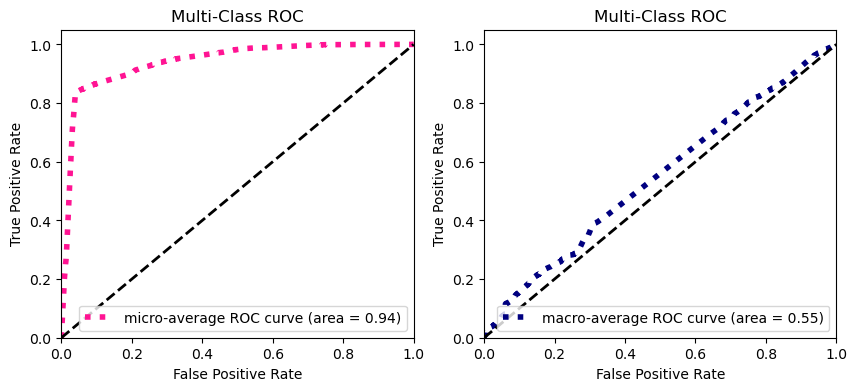

In [24]:
n_classes = 5

# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC')
plt.legend(loc="lower right")
plt.show()

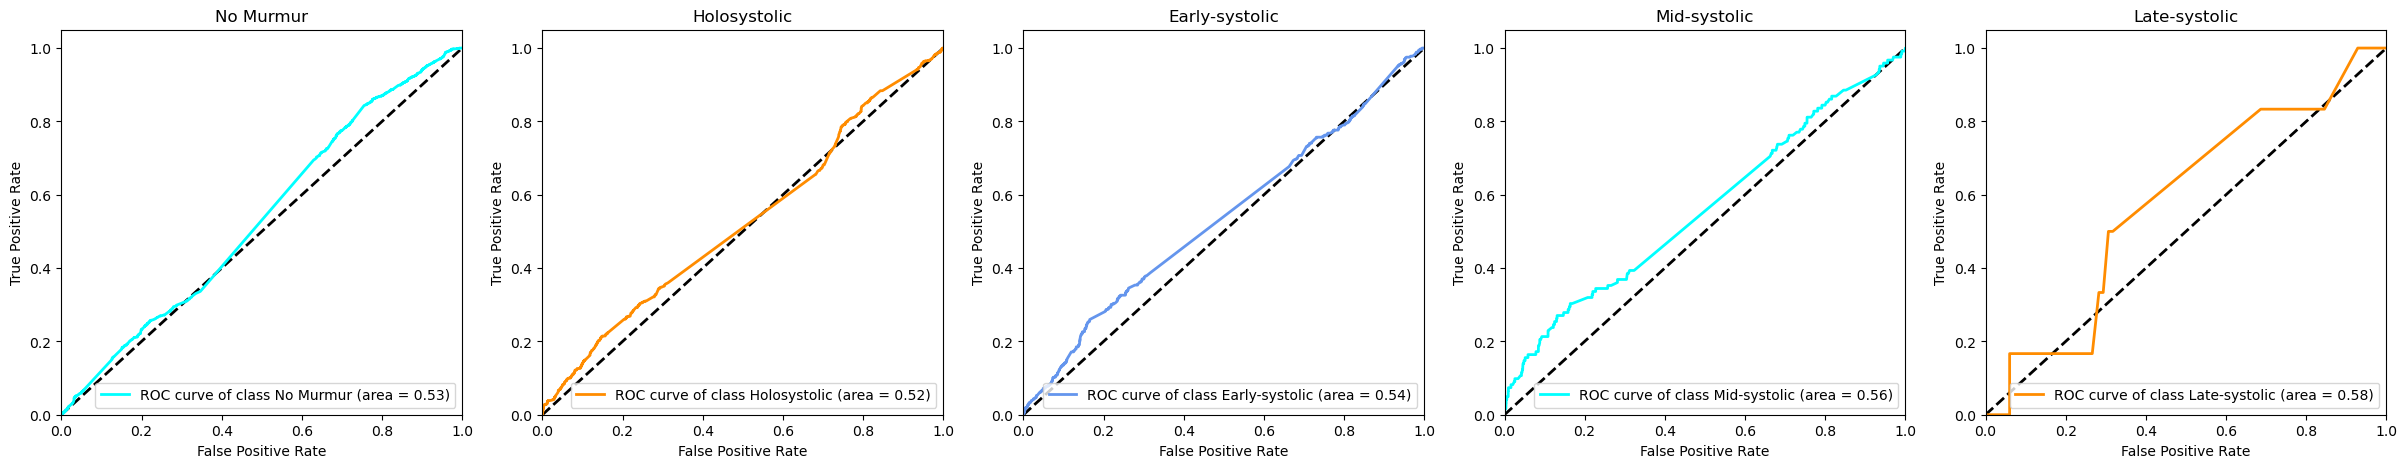

In [25]:
plt.close()
plt.figure(figsize=(30, 5))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
title = ['No Murmur', "Holosystolic", "Early-systolic", "Mid-systolic", "Late-systolic"]
for i, color in zip(range(n_classes), colors):
    if i == 0:
        plt.subplot(151)
    elif i == 1:
        plt.subplot(152)
    elif i == 2:
        plt.subplot(153)
    elif i == 3:
        plt.subplot(154)
    else:
        plt.subplot(155)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(title[i], roc_auc[i]))
    plt.legend(loc="lower right")
    
plt.show()